In [7]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
N = 1000
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

### **Real distribution**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


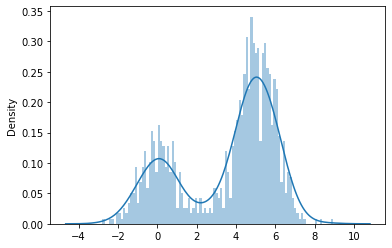

In [13]:
sns.distplot(X, bins = 100)

In [4]:
class Parzen:
    data = []
    h = 1
    def __init__(self, data: list = []):
        self.data = data

    def set_window_size(self, h):
        self.h = h

    def get_dist(self, x):
        after_kernel = lambda i: st.norm.pdf((x-i)/self.h)
        kernelized = map(after_kernel,self.data)
        return sum(kernelized)/len(self.data)

###**Window = 10**

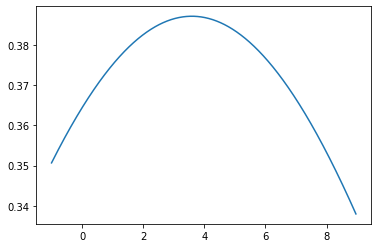

In [ ]:
parzen_model = Parzen(X)
x = np.linspace(-1,max(X),1000)
y = parzen_model.get_dist(x)
parzen_model.set_window_size(10)
plt.plot(x,parzen_model.get_dist(x))

###**Window = 1**

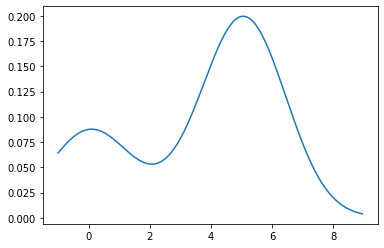

In [ ]:
parzen_model.set_window_size(1)
plt.plot(x,parzen_model.get_dist(x))

###**Window = 0.1**

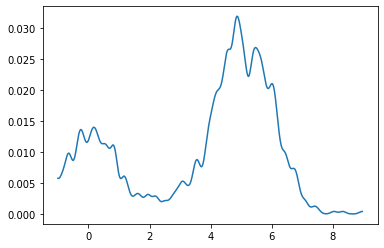

In [ ]:
parzen_model.set_window_size(0.1)
plt.plot(x,parzen_model.get_dist(x))

# **Conclusion**
##### **When the window size is equal to 10, the model suffers from underfitting, and if it is equal to 0.1, it also pays attention to the data noise and suffers from overfitting. It performs the best fit when the window size is equal to one.**